<a href="https://colab.research.google.com/github/adityaahuja7/Statistical-Machine-Learning-Models/blob/main/SML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model-1**

In [ ]:
import numpy as np
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train.resize(60000,28*28)
x_test.resize(10000,28*28)


from sklearn.tree import DecisionTreeRegressor


In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_accuracy =[] 
trees=[]

def GradientBoosting(X,test_X,Y,test_Y,n,lrn,ite):
    preds = np.full(n,np.mean(Y))
    for i in range(ite):
      res = Y-preds
      cur = DecisionTreeRegressor(max_depth=1)
      cur.fit(X,res)
      train_pred = cur.predict(X)
      preds += lrn*train_pred
      train_accuracy.append(accuracy_score(preds.astype(int),Y))
      trees.append(cur)

n = 60000
lrn = 0.1
ite = 5
GradientBoosting(x_train,x_test,y_train,y_test,n,lrn,ite)




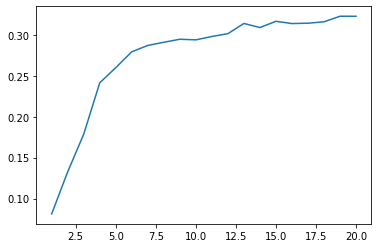

In [ ]:
itrs = [i for i in range(1,ite+1)]
plt.plot(itrs,train_accuracy)
plt.show()

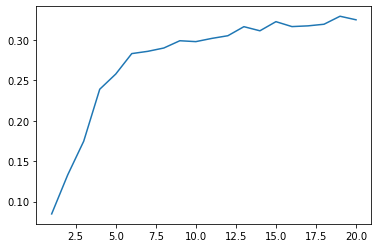

FINAL TEST ACCURACY: 0.3248


In [ ]:
test_accuracy = []
test_preds = np.full(10000,np.mean(y_train))
for i in range(ite):
  curpred = trees[i].predict(x_test)
  test_preds+= lrn*curpred
  test_accuracy.append(accuracy_score(test_preds.astype(int),y_test))

plt.plot([i for i in range(1,ite+1)],test_accuracy)
plt.show()
print("FINAL TEST ACCURACY:",test_accuracy[-1])

  


# **Model-2**

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import initializers
from keras import optimizers
from matplotlib import pyplot
from keras.layers import Dropout
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.models import load_model

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping


In [ ]:
(train_images, train_labels), (test_imagesall, test_labelsall) = keras.datasets.fashion_mnist.load_data()



val_images = test_imagesall[0:500,:,:]
val_labels = test_labelsall[0:500]
test_images = test_imagesall[500:,:,:]
test_labels = test_labelsall[500:]

train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5
val_images = (val_images / 255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))
val_images = val_images.reshape((-1, 784))

model = Sequential()
model.add(Dense(64,input_dim = 784, trainable=True,activation='relu', use_bias=True, 
                kernel_initializer=initializers.he_normal(seed=None)))
model.add(Dropout(0.5))


model.add(Dense(64, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))


model.add(Dense(10, trainable=True, activation='softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(
  optimizer=sgd,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4096      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4096      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', 
                     verbose=1, save_best_only=True)

History = model.fit(  #Batch Size = 512
  train_images,
  to_categorical(train_labels),
  validation_data=(val_images, to_categorical(val_labels)),  
  epochs=30,
  batch_size=512,
  shuffle = True,
  callbacks=[es,mc]
)

Epoch 1/30
116/118 [============================>.] - ETA: 0s - loss: 1.2396 - accuracy: 0.5816
Epoch 1: val_accuracy improved from -inf to 0.78000, saving model to best_model.h5
118/118 [==============================] - 2s 8ms/step - loss: 1.2358 - accuracy: 0.5829 - val_loss: 0.7639 - val_accuracy: 0.7800
Epoch 2/30
116/118 [============================>.] - ETA: 0s - loss: 0.7545 - accuracy: 0.7371
Epoch 2: val_accuracy improved from 0.78000 to 0.81800, saving model to best_model.h5
118/118 [==============================] - 1s 7ms/step - loss: 0.7540 - accuracy: 0.7375 - val_loss: 0.5593 - val_accuracy: 0.8180
Epoch 3/30
117/118 [============================>.] - ETA: 0s - loss: 0.6547 - accuracy: 0.7704
Epoch 3: val_accuracy improved from 0.81800 to 0.83600, saving model to best_model.h5
118/118 [==============================] - 1s 7ms/step - loss: 0.6546 - accuracy: 0.7706 - val_loss: 0.4818 - val_accuracy: 0.8360
Epoch 4/30
116/118 [============================>.] - ETA: 0s - 

In [ ]:
model = load_model('best_model.h5')
score = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

297/297 [==============================] - 1s 2ms/step - loss: 0.3790 - accuracy: 0.8631


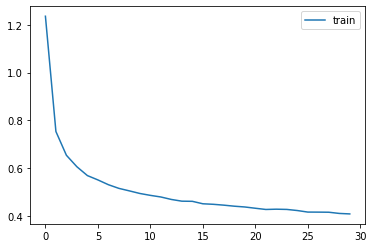

In [ ]:
pyplot.plot(History.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [ ]:
preds = np.argmax(model.predict(test_images), axis=1)
print(preds)
print(test_labels)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels,preds)
for i in range(0,10):
  print("Class accuracy for class-"+str(i)+":",cm[i][i]/list(test_labels).count(0))

[2 0 5 ... 8 1 5]
[2 0 5 ... 8 1 5]
Class accuracy for class-0: 0.6962962962962963
Class accuracy for class-1: 0.9587301587301588
Class accuracy for class-2: 0.7904761904761904
Class accuracy for class-3: 0.9164021164021164
Class accuracy for class-4: 0.8031746031746032
Class accuracy for class-5: 0.9470899470899471
Class accuracy for class-6: 0.6285714285714286
Class accuracy for class-7: 0.9386243386243386
Class accuracy for class-8: 0.9862433862433863
Class accuracy for class-9: 0.9576719576719577


# **Model-3**


In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import initializers
from keras import optimizers
from matplotlib import pyplot
from keras.layers import Dropout
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.models import load_model

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [ ]:
from sklearn import metrics
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train.resize(60000,28*28)
x_test.resize(10000,28*28)

from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(x_train,
                                                             x_train, 
                                                             train_size=0.8, 
                                                             random_state=13)




input = keras.Input(shape=(784,))
x = keras.layers.Dense(512,activation='relu')(input)
x = keras.layers.Dense(128,activation="relu")(x)
latent = keras.layers.Dense(64,activation="relu")(x)
x = keras.layers.Dense(128,activation="relu")(latent)
x = keras.layers.Dense(512,activation="relu")(x)
decoded = keras.layers.Dense(784,activation="relu")(x)

autoencoder = keras.Model(input, decoded)


opt = keras.optimizers.Adam(learning_rate=0.01)


autoencoder.compile(loss='mean_squared_error',optimizer=opt)
#Mean-Squared-Error loss has been used since we want to train the model to encode the 
#images and then reconstruct the orignal images with minimum total loss in pixel values.
autoencoder.summary()

#PARAMATERS 
#



Model: "model_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_213 (Dense)           (None, 512)               401920    
                                                                 
 dense_214 (Dense)           (None, 128)               65664     
                                                                 
 dense_215 (Dense)           (None, 64)                8256      
                                                                 
 dense_216 (Dense)           (None, 128)               8320      
                                                                 
 dense_217 (Dense)           (None, 512)               66048     
                                                                 
 dense_218 (Dense)           (None, 784)               402

In [ ]:
History = autoencoder.fit(train_X, train_ground,
                epochs=10,
                batch_size=128,
                verbose=1,
                shuffle=True,
                validation_data=(valid_X, valid_ground))

Epoch 1/10
375/375 [==============================] - 9s 22ms/step - loss: 0.0818 - val_loss: 0.0296
Epoch 2/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0270 - val_loss: 0.0248
Epoch 3/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0236 - val_loss: 0.0231
Epoch 4/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0220 - val_loss: 0.0216
Epoch 5/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0212 - val_loss: 0.0215
Epoch 6/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0207 - val_loss: 0.0207
Epoch 7/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0205 - val_loss: 0.0204
Epoch 8/10
375/375 [==============================] - 7s 20ms/step - loss: 0.0202 - val_loss: 0.0202
Epoch 9/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0200 - val_loss: 0.0199
Epoch 10/10
375/375 [==============================] - 8s 20ms/step - loss: 0.0198 - val_lo

(10000, 784)
Test Images


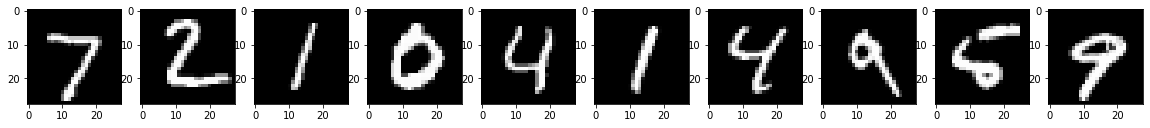

Reconstruction of Test Images


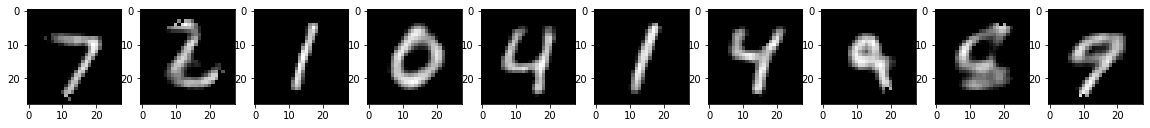

In [ ]:
pred = autoencoder.predict(x_test.reshape(-1,784))
pred = pred.reshape(-1,28,28)
print(x_test.shape)
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    curr_lbl = y_test[i]
    #plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i].reshape(28,28), cmap='gray')  
plt.show()

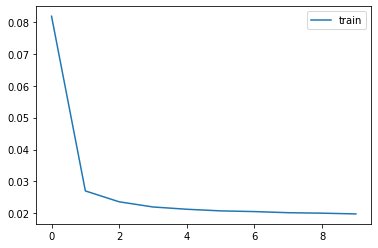

In [ ]:
pyplot.plot(History.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [ ]:


#Removed the decoder and appended 2 more layer to convert to a classification model

input = keras.Input(shape=(784,))
x = keras.layers.Dense(512,activation='relu')(input)
x = keras.layers.Dense(128,activation="relu")(x)
latent = keras.layers.Dense(64,activation="relu")(x)
x = keras.layers.Dense(32,activation="relu")(latent)
output = keras.layers.Dense(10,activation="softmax")(x)
final = keras.Model(input,output)
final.summary()

opt = keras.optimizers.Adam(learning_rate=0.01)

final.compile(optimizer=opt,loss='categorical_crossentropy',
                    metrics=['accuracy'])

Model: "model_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_219 (Dense)           (None, 512)               401920    
                                                                 
 dense_220 (Dense)           (None, 128)               65664     
                                                                 
 dense_221 (Dense)           (None, 64)                8256      
                                                                 
 dense_222 (Dense)           (None, 32)                2080      
                                                                 
 dense_223 (Dense)           (None, 10)                330       
                                                                 
Total params: 478,250
Trainable params: 478,250
Non-traina

In [ ]:
History = final.fit(x_train,to_categorical(y_train),epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3113 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1950 - accuracy: 0.9523
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1823 - accuracy: 0.9572
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1645 - accuracy: 0.9623
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1476 - accuracy: 0.9663
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1397 - accuracy: 0.9686
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1359 - accuracy: 0.9692
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1766 - accuracy: 0.9618
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1252 - accuracy: 0.9730
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.14

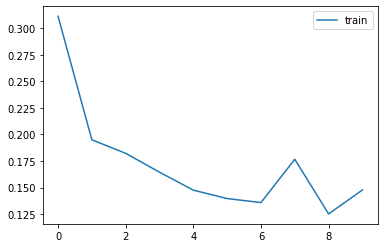

In [ ]:
pyplot.plot(History.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [ ]:
preds = np.argmax(final.predict(x_test), axis=1)

score = final.evaluate(x_test,to_categorical(y_test))
print(score)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,preds)
for i in range(0,10):
  print("Class accuracy for class-"+str(i)+":",cm[i][i]/list(y_test).count(i))

313/313 [==============================] - 1s 2ms/step - loss: 0.1864 - accuracy: 0.9599
[0.18638330698013306, 0.9599000215530396]
Class accuracy for class-0: 0.9826530612244898
Class accuracy for class-1: 0.9682819383259912
Class accuracy for class-2: 0.9738372093023255
Class accuracy for class-3: 0.9643564356435643
Class accuracy for class-4: 0.9511201629327902
Class accuracy for class-5: 0.9708520179372198
Class accuracy for class-6: 0.9728601252609603
Class accuracy for class-7: 0.9591439688715954
Class accuracy for class-8: 0.9117043121149897
Class accuracy for class-9: 0.9435084241823588


# **Model-4**

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train.resize(60000,28*28)
x_test.resize(10000,28*28)

def BaggingClassifier (Xtrain,Ytrain,Xtest,Ytest,bs):

    Classifiers = []

    for i in range(bs):
      ind = np.random.choice(len(Xtrain),size = len(Xtrain))
      Xcurrent = Xtrain[ind]
      Ycurrent = Ytrain[ind]
      
      Tree = DecisionTreeClassifier(max_depth = 4 , max_features = 'sqrt')
      Tree.fit(Xcurrent,Ycurrent)
      Classifiers.append(Tree)

    preds = []

    for i in range(bs):
      preds.append(Classifiers[i].predict(Xtest))

    preds = np.array(preds)

    finalpred =[]
    #Generating a prediction array
    for i in range(10000):
      col = preds[:,i]
      finalpred.append(np.bincount(col).argmax())

    print(accuracy_score(y_test,finalpred))

    cm = confusion_matrix(y_test,finalpred)
    for i in range(0,10):
      print("Class accuracy for class-"+str(i)+":",cm[i][i]/list(y_test).count(i))
      

  
BaggingClassifier(x_train,y_train,x_test,y_test,3) #BAG SIZE = 3




0.5707
Class accuracy for class-0: 0.8112244897959183
Class accuracy for class-1: 0.9480176211453745
Class accuracy for class-2: 0.42248062015503873
Class accuracy for class-3: 0.6297029702970297
Class accuracy for class-4: 0.5835030549898167
Class accuracy for class-5: 0.25448430493273544
Class accuracy for class-6: 0.46346555323590816
Class accuracy for class-7: 0.6517509727626459
Class accuracy for class-8: 0.5277207392197125
Class accuracy for class-9: 0.3330029732408325
